## Prerequisites

In [1]:
#!pip install keras

In [2]:
import numpy as np
import keras

Using TensorFlow backend.


## Load Dataset

In [3]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize

[5 0 4 1 9 2 1 3 1 4]


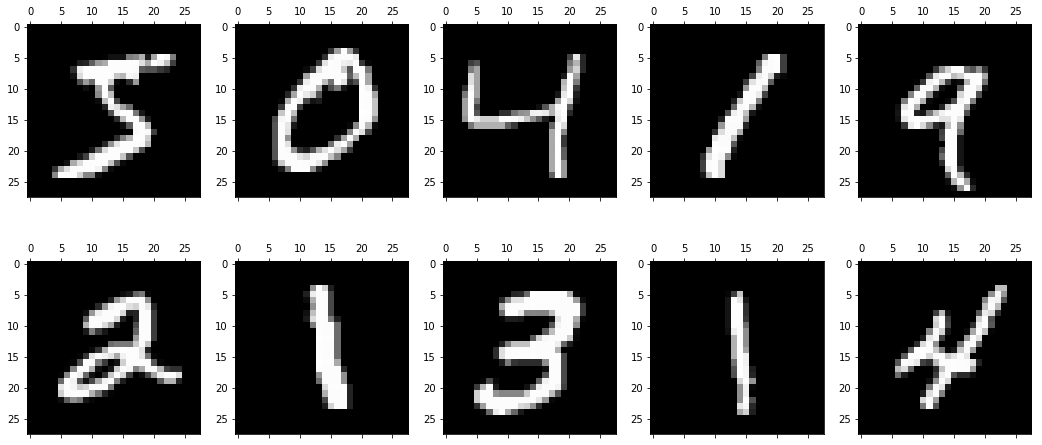

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [5]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


## Build a Model

### Single-layer Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=0.0, maxval=0.001),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.00001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
model.fit(X_train,
          y_train_hot,
          epochs=20,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s - loss: 2.3007 - acc: 0.1833 - val_loss: 2.2730 - val_acc: 0.1721
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 1.7483 - acc: 0.1255 - val_loss: 1.0430 - val_acc: 0.1134
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 1.0242 - acc: 0.1142 - val_loss: 0.9978 - val_acc: 0.1162
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.9995 - acc: 0.1177 - val_loss: 0.9818 - val_acc: 0.1193
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.9884 - acc: 0.1222 - val_loss: 0.9823 - val_acc: 0.1273
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.9819 - acc: 0.1276 - val_loss: 0.9854 - val_acc: 0.1263
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.9761 - acc: 0.1347 - val_loss: 0.9743 - val_acc: 0.1293
Epoch 8/20
60000/60000 [==============================] - 1s 

In [9]:
import pandas as pd

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.913900


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


### Multi-layer Neural Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=1000,
                kernel_initializer=RandomUniform(minval=-0.058, maxval=0.058),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=-0.077, maxval=0.077)))

model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.0001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train,
          y_train_hot,
          epochs=100,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s - loss: 2.1610 - acc: 0.2403 - val_loss: 2.0011 - val_acc: 0.4253
Epoch 2/100
60000/60000 [==============================] - 14s - loss: 1.8303 - acc: 0.5270 - val_loss: 1.6116 - val_acc: 0.6499
Epoch 3/100
60000/60000 [==============================] - 14s - loss: 1.4330 - acc: 0.6865 - val_loss: 1.2356 - val_acc: 0.7538
Epoch 4/100
60000/60000 [==============================] - 14s - loss: 1.1249 - acc: 0.7665 - val_loss: 0.9921 - val_acc: 0.8031
Epoch 5/100
60000/60000 [==============================] - 14s - loss: 0.9302 - acc: 0.8084 - val_loss: 0.8421 - val_acc: 0.8273
Epoch 6/100
60000/60000 [==============================] - 14s - loss: 0.8049 - acc: 0.8327 - val_loss: 0.7425 - val_acc: 0.8464
Epoch 7/100
60000/60000 [==============================] - 14s - loss: 0.7185 - acc: 0.8492 - val_loss: 0.6719 - val_acc: 0.8577
Epoch 8/100
60000/60000 [======================

60000/60000 [==============================] - 18s - loss: 0.2323 - acc: 0.9438 - val_loss: 0.2737 - val_acc: 0.9248
Epoch 64/100
60000/60000 [==============================] - 18s - loss: 0.2306 - acc: 0.9443 - val_loss: 0.2725 - val_acc: 0.9251
Epoch 65/100
60000/60000 [==============================] - 18s - loss: 0.2290 - acc: 0.9446 - val_loss: 0.2714 - val_acc: 0.9252
Epoch 66/100
60000/60000 [==============================] - 18s - loss: 0.2274 - acc: 0.9450 - val_loss: 0.2703 - val_acc: 0.9255
Epoch 67/100
60000/60000 [==============================] - 18s - loss: 0.2259 - acc: 0.9453 - val_loss: 0.2694 - val_acc: 0.9253
Epoch 68/100
60000/60000 [==============================] - 18s - loss: 0.2244 - acc: 0.9457 - val_loss: 0.2682 - val_acc: 0.9257
Epoch 69/100
60000/60000 [==============================] - 18s - loss: 0.2229 - acc: 0.9459 - val_loss: 0.2673 - val_acc: 0.9260
Epoch 70/100
60000/60000 [==============================] - 17s - loss: 0.2214 - acc: 0.9464 - val_loss

In [12]:
import pandas as pd

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.930400


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9
